In [9]:
import pyvisa

rm = pyvisa.ResourceManager()
rm.list_resources()
inst = rm.open_resource('GPIB0::17::INSTR')

inst.write("*IDN?")
print(inst.read())

inst.write(":CORR:LOAD:TYPE RX")
inst.write(":CORR:LOAD:TYPE?")
print(inst.read())

Keysight Technologies,E4980AL,MY54305061,B.07.01

RX



In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from pymeasure.instruments.agilent import AgilentE4980
from pymeasure.experiment.experiment import Experiment
from E4980AL import E4980ALProcedure

In [4]:
# connect to the instrument and get handle
e4980a = AgilentE4980("GPIB0::17::INSTR")
e4980a.ac_voltage = 0.022
e4980a.mode = "RX"
e4980a.aperture('short', averages=1)


12:19:15 AM: Using data file: C:\Users\ADMINI~1\AppData\Local\Temp\tmpksdsyxx1 (root, INFO)
12:19:15 AM: Using data file: C:\Users\ADMINI~1\AppData\Local\Temp\tmpksdsyxx1 (root, INFO)
12:19:15 AM: Using data file: C:\Users\ADMINI~1\AppData\Local\Temp\tmpksdsyxx1 (root, INFO)
12:19:15 AM: Using data file: C:\Users\ADMINI~1\AppData\Local\Temp\tmpksdsyxx1 (root, INFO)
12:19:15 AM: Set up Results (root, INFO)
12:19:15 AM: Set up Results (root, INFO)
12:19:15 AM: Set up Results (root, INFO)
12:19:15 AM: Set up Results (root, INFO)
12:19:15 AM: Create worker (root, INFO)
12:19:15 AM: Create worker (root, INFO)
12:19:15 AM: Create worker (root, INFO)
12:19:15 AM: Create worker (root, INFO)
12:19:15 AM: Starting worker... (root, INFO)
12:19:15 AM: Starting worker... (root, INFO)
12:19:15 AM: Starting worker... (root, INFO)
12:19:15 AM: Starting worker... (root, INFO)
12:19:15 AM: Worker thread started (root, INFO)
12:19:15 AM: Worker thread started (root, INFO)
12:19:15 AM: Worker thread start

AttributeError: 'list' object has no attribute '_xorig'

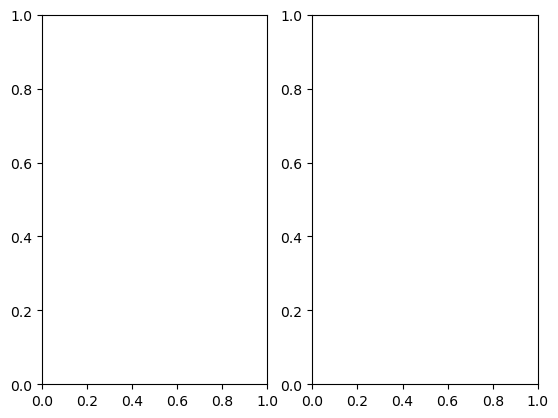

12:20:10 AM: Worker caught an error on <E4980ALProcedure(status=Running,parameters_are_set=True)> (root, ERROR)
Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\lib\site-packages\pymeasure\experiment\workers.py", line 176, in run
    self.procedure.execute()
  File "c:\Users\Administrator\Documents\GitHub\Keysight_E4980AL_impedance\E4980AL.py", line 47, in execute
    results=self.instrument.freq_sweep(frequencies)
  File "c:\ProgramData\Anaconda3\lib\site-packages\pymeasure\instruments\agilent\agilentE4980.py", line 141, in freq_sweep
    a_data = [measured[_] for _ in range(0, 4 * len(freq_list), 4)]
  File "c:\ProgramData\Anaconda3\lib\site-packages\pymeasure\instruments\agilent\agilentE4980.py", line 141, in <listcomp>
    a_data = [measured[_] for _ in range(0, 4 * len(freq_list), 4)]
IndexError: list index out of range
12:20:10 AM: Worker caught an error on <E4980ALProcedure(status=Running,parameters_are_set=True)> (root, ERROR)
Traceback (most recent call last

In [ ]:
# conduct "fast" sweep
import numpy as np
from matplotlib import pyplot as plt

datafile='test.csv'

sweep_type='LIN'
start_freq=20
stop_freq=100000
sweep_reverse=True
num_points=15
if sweep_type=='LIN':
    frequencies = np.linspace(start_freq, stop_freq, num_points)
elif sweep_type=='LOG':
    frequencies = np.logspace(np.log10(start_freq), np.log10(stop_freq), num_points)
if sweep_reverse:
    frequencies = frequencies[::-1]

title="E4980AL Test"
procedure = E4980ALProcedure()
experiment = Experiment(title, procedure)
experiment.start()

import pylab as pl
ax1 = pl.subplot(121)
experiment.plot('Frequency','Z\'',ax=ax1)
hl1,_ = ax1.get_legend_handles_labels()
ax2 = pl.subplot(122)
experiment.plot('Frequency','Z\"',ax=ax2)
hl2,_ = ax2.get_legend_handles_labels()
while True:
    try:
        experiment.update_line(ax1, hl1[0], 'Frequency','Z\'')
        pl.pause(0.1)
    except KeyboardInterrupt:
        break
    





In [ ]:
# conduct "slow" sweep
import numpy as np
sweep_type='LIN'
start_freq=20
stop_freq=100000
sweep_reverse=True
num_points=15
if sweep_type=='LIN':
    frequencies = np.linspace(start_freq, stop_freq, num_points)
elif sweep_type=='LOG':
    frequencies = np.logspace(np.log10(start_freq), np.log10(stop_freq), num_points)
if sweep_reverse:
    frequencies = frequencies[::-1]
    

In [14]:
read_value=e4980a.ask("*IDN?")
print(read_value)

Keysight Technologies,E4980AL,MY54305061,B.07.01

